# Final project
## Name

In [ ]:
#import file
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
#read CSV
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
print(df)
print(df.shape)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
#split dataset into training and testing

from sklearn.model_selection import train_test_split

tempCSV = (df['Pregnancies']+df['Glucose']+df['BloodPressure']+df['SkinThickness']+df['Insulin']+df['BMI']+df['Age'])*df['DiabetesPedigreeFunction']
X = []
for i in range(len(df['Outcome'])):
  X.append(tempCSV[i])

y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [ ]:
#decision tree classifier
#with halving grid search
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

clf = tree.DecisionTreeClassifier()

param_grid = {"max_depth": [1,50],"min_samples_split": [2, 50],"min_samples_leaf":[1, 50]}

#reshape the order of the array no data is changed
X_train_tree = np.reshape(X_train,(-1, 1))
X_test_tree = np.reshape(X_test,(-1, 1))


#search = HalvingGridSearchCV(clf, param_grid, resource='n_estimators',max_resources=10,random_state=0).fit(X_train_tree, y_train)
search = HalvingGridSearchCV(clf, param_grid, random_state=0).fit(X_train_tree, y_train)
print(search.best_params_ )


{'max_depth': 50, 'min_samples_leaf': 50, 'min_samples_split': 50}


17
0.6703910614525139
0.7142857142857143


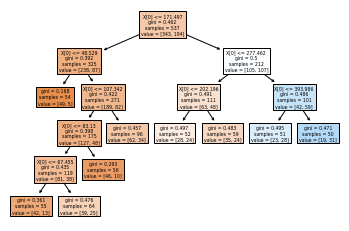

In [ ]:
newClf = tree.DecisionTreeClassifier(min_samples_leaf=50, min_samples_split=50)
#0.71428 50,50
#newClf = tree.DecisionTreeClassifier()
#score = 0.54978

newClf.fit(X_train_tree, y_train)

classes = tree.plot_tree(newClf, filled=True)
print(len(classes))

print(newClf.score(X_train_tree,y_train))

#predictions = newClf.predict(X_test_tree)
scores = newClf.score(X_test_tree, y_test)

#print(predictions)
print(scores)

#rms = mean_squared_error(y_test, predictions, squared=True)
#print(rms)

In [ ]:
# naive bayes implementaion
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnbClf = GaussianNB()

gnbClf.fit(X_train_tree, y_train)

print(gnbClf.score(X_train_tree,y_train))

nbScore = gnbClf.score(X_test_tree, y_test)
print(nbScore)

multiClf = MultinomialNB()
multiClf.fit(X_train_tree, y_train)
print(multiClf.score(X_train_tree,y_train))

multiScore = multiClf.score(X_test_tree,y_test)
print(multiScore)


0.6629422718808193
0.6926406926406926
0.638733705772812
0.6796536796536796


In [ ]:
# SVM implementation
from sklearn import svm

svcClf = svm.SVC()
svcClf.fit(X_train_tree, y_train)
print(svcClf.score(X_train_tree, y_train))

svcScore = svcClf.score(X_test_tree, y_test)
print(svcScore)

linClf = svm.LinearSVC()
linClf.fit(X_train_tree,y_train)
print(linClf.score(X_train_tree,y_train))

linScore = linClf.score(X_test_tree,y_test)
print(linScore)

nonLinClf = svm.NuSVC(gamma="auto")
nonLinClf.fit(X_train_tree,y_train)
print(nonLinClf.score(X_train_tree,y_train))

nonLinScore = nonLinClf.score(X_test_tree,y_test)
print(nonLinScore)


0.659217877094972
0.7142857142857143
0.638733705772812
0.6796536796536796
0.8584729981378026
0.6017316017316018


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
